# Example: REV analysis for permeability

This example demonstrates how to perform REV analysis for permeability, calculated using FDMSS solver.

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import Permeability

In [2]:
#metric and analyzer inizialization. 

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = (300, 300, 300) #size of image in x, y and z directions
n_steps = 6 # number of subsamples selection steps
sREV_max_step = 4 #maximal step for which sREV analysis is performed.
datadir = 'data' # path to the folder containing image, default: None
outputdir = 'output' # path to the output folder containing generated data, default: 'output'
direction = 'z' #could be 'x', 'y', 'z' or 'all'. If label of this parameter is 'all', permeability values are
                 #generated for all 3 possible flow directions.
n_threads = 32 #number of CPU cores used by FDMSS, default: 1
resolution = 1. #resolution of studied sample (micrometers), default: 1.
show_time = True #default: False. Added to monitor time cost for large images.
metric = Permeability(direction = direction, n_threads = n_threads, resolution = resolution, show_time = show_time)
analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

In [3]:
# metric generation
analyzer.generate()

---fdmss run time is 505.04185485839844 seconds ---


In [4]:
#fix thresholds and analyze generated data
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [5]:
#get mean, std and normed std values for different step
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)

#get sREV and dREV sizes
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)

{1: 2.6622572832958102, 2: 2.8447236994038483, 3: 3.2411800611895014, 4: 3.3527991283558354, 5: 3.7126685356963542, 6: 3.1556135083792585}
{1: 3.3129002914432544, 2: 0.6019640368126938, 3: 0.5716661738219077, 4: 0.31320612118451113}
{1: 1.2443952401707636, 2: 0.21160720703344366, 3: 0.1763759380933956, 4: 0.09341630953540092}
150
50
50


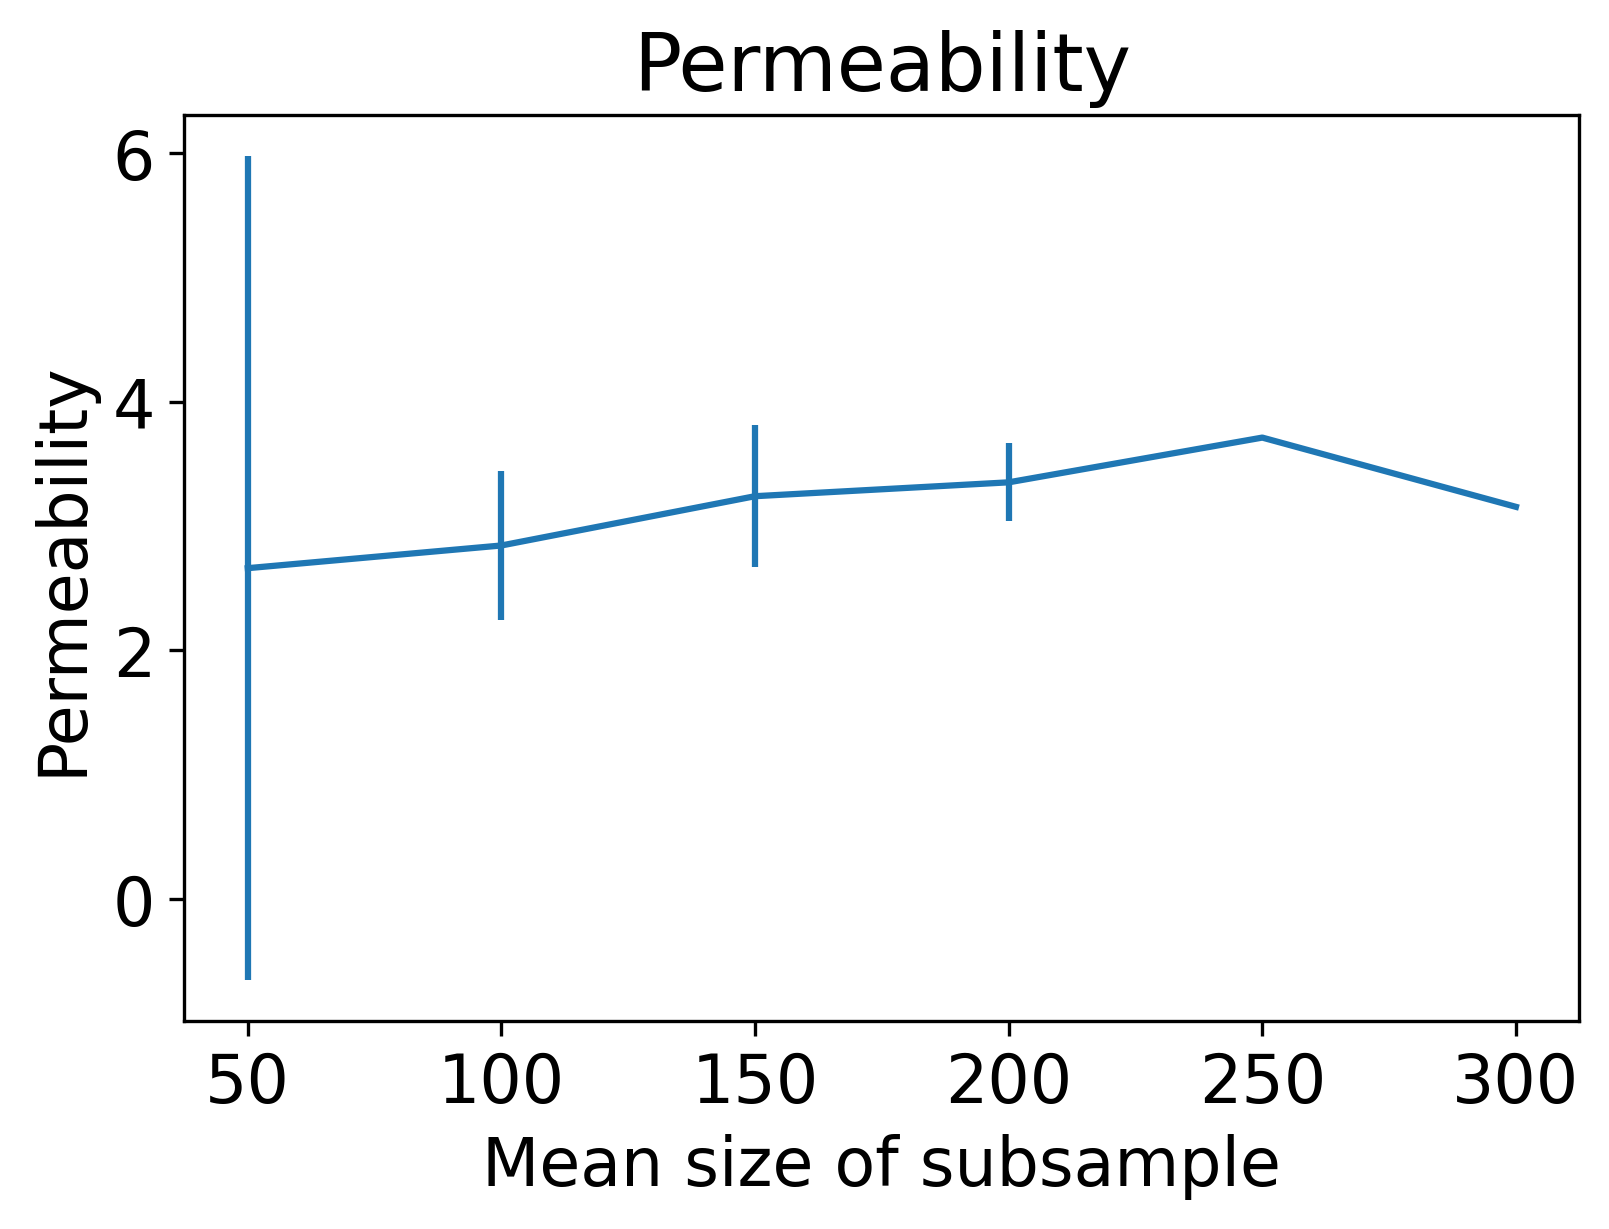

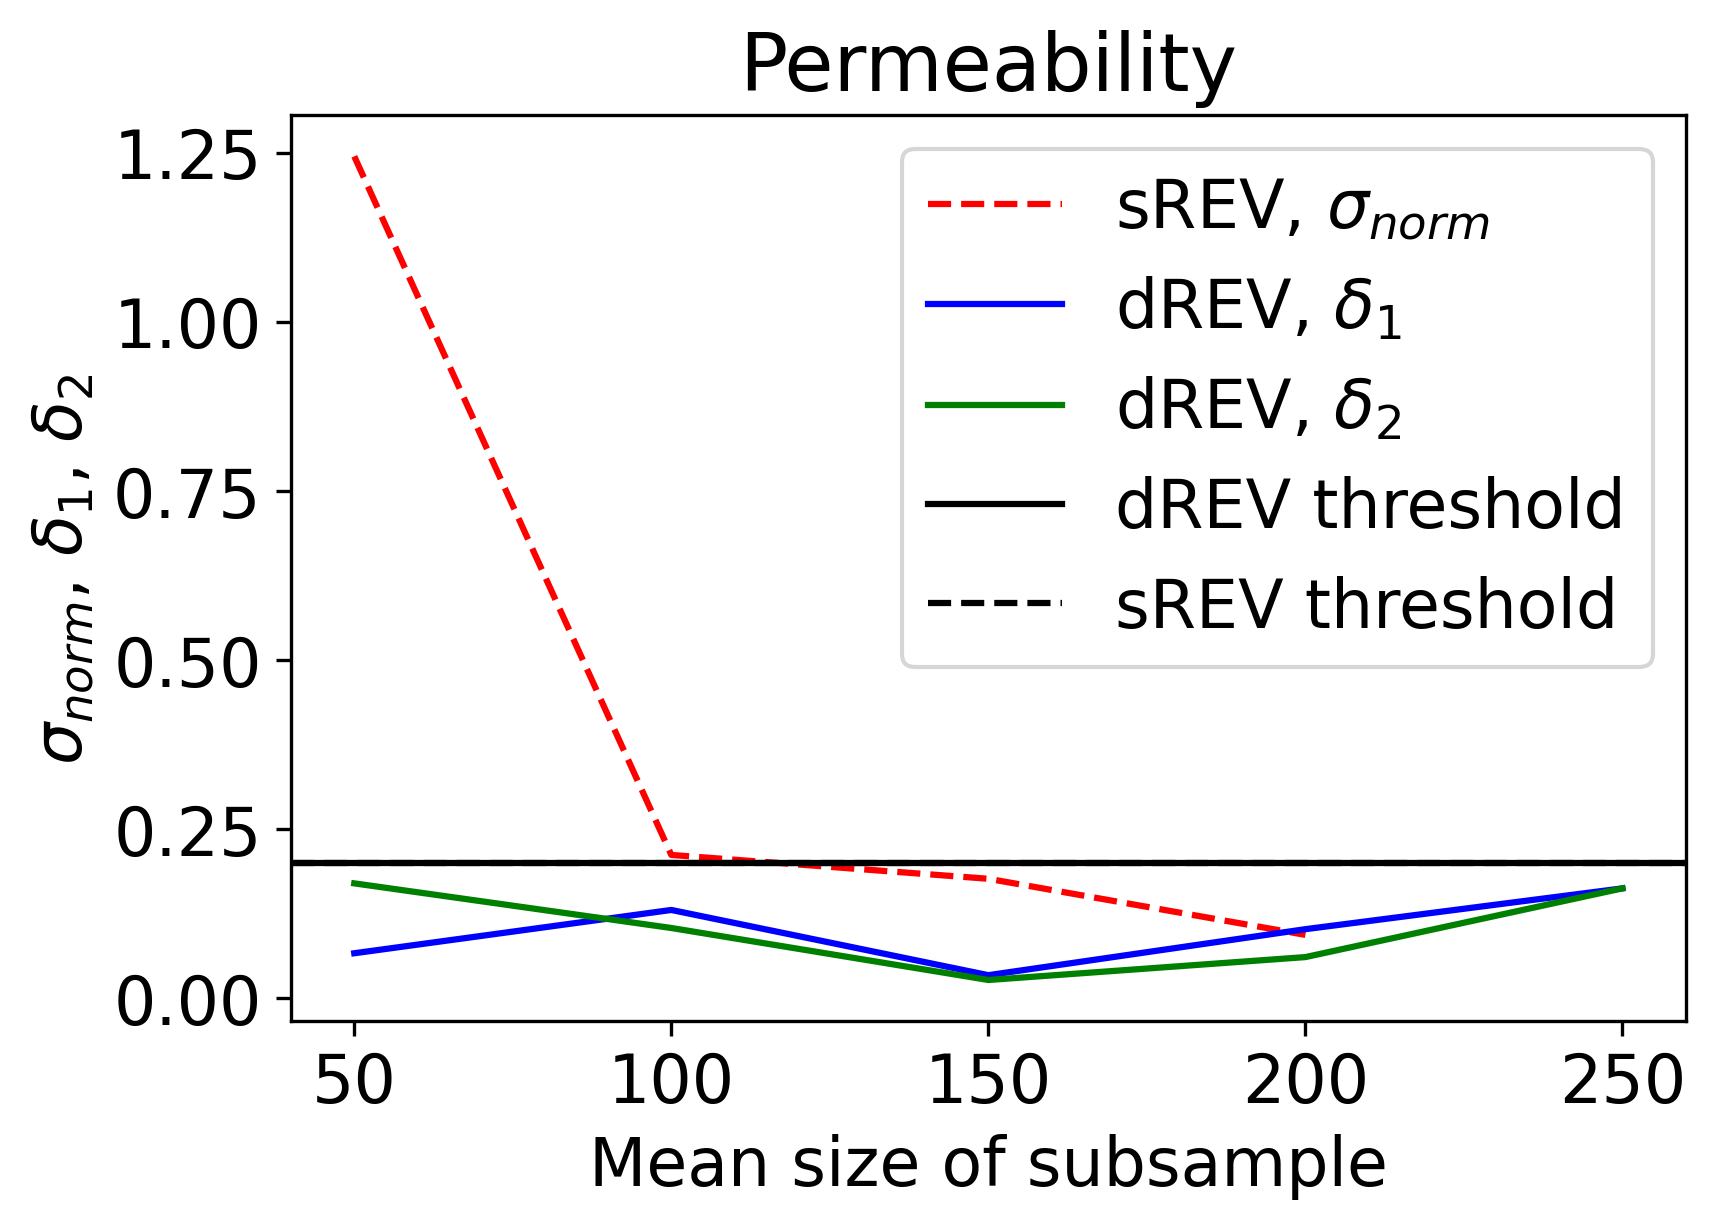

In [6]:
analyzer.show_results()